<a href="https://colab.research.google.com/github/snowman74/Neural-Networks/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B9%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8_%D0%BF%D1%80%D0%BE%D0%B4%D0%BE%D0%BB%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
%matplotlib inline

In [ ]:
def createModel():

  model = Sequential()

  model.add(Dense(800, input_dim=784, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data() # Загружаем базу MNIST
x_tr = x_tr.reshape(60000, 784) # Меняем размерности
x_te = x_te.reshape(10000, 784)
# Создаем общий датафрейм, чтобы иметь возможность самим выбирать размеры обучающей и тестовой выборки
pd_train = pd.DataFrame(x_tr)
pd_train['Y'] = y_tr
pd_test = pd.DataFrame(x_te)
pd_test['Y'] = y_te
data_pd = pd_train.append(pd_test, ignore_index=True)
X = data_pd.iloc[:70000, :784].values
Y = data_pd['Y'].values

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# нормализуем данные
X = X.astype('float32')
X = X / 255
Y = utils.to_categorical(Y, 10)

**Запустим сеть с различными размерами обучающей и проверочной выборок**

In [ ]:
res = {}
for train_var in [50000, 10000, 500, 250]:
  model = createModel()

  res[f'Размер обуч.выборки={train_var}'] = model.fit(X[:train_var],
                                                      Y[:train_var],
                                                      batch_size=50,
                                                      epochs=15,
                                                      validation_data=(X[-train_var:],
                                                                       Y[-train_var:]))

Epoch 1/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1994 - accuracy: 0.9393 - val_loss: 0.1001 - val_accuracy: 0.9689
Epoch 2/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 3/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.0618 - val_accuracy: 0.9806
Epoch 4/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.0528 - val_accuracy: 0.9841
Epoch 5/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0594 - val_accuracy: 0.9838
Epoch 6/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 7/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0543 - val_accuracy:

In [ ]:
res['Размер обуч.выборки=500'].history['val_accuracy']

[0.7080000042915344,
 0.777999997138977,
 0.7639999985694885,
 0.7879999876022339,
 0.8259999752044678,
 0.8100000023841858,
 0.8199999928474426,
 0.8299999833106995,
 0.828000009059906,
 0.8199999928474426,
 0.8199999928474426,
 0.8240000009536743,
 0.8259999752044678,
 0.8220000267028809,
 0.8240000009536743]

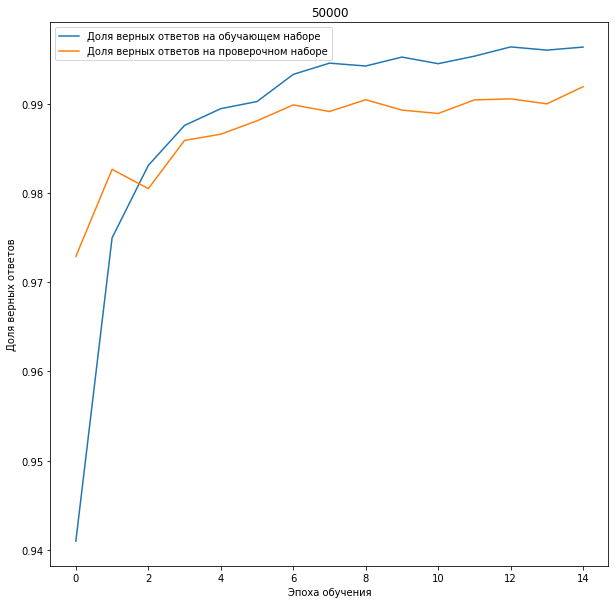

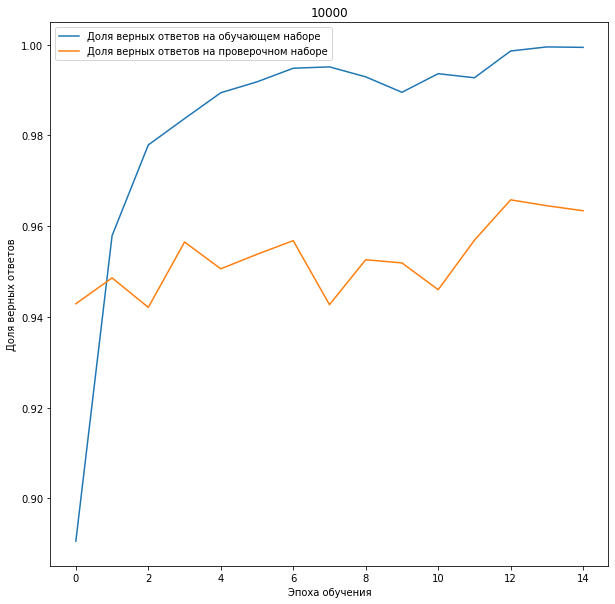

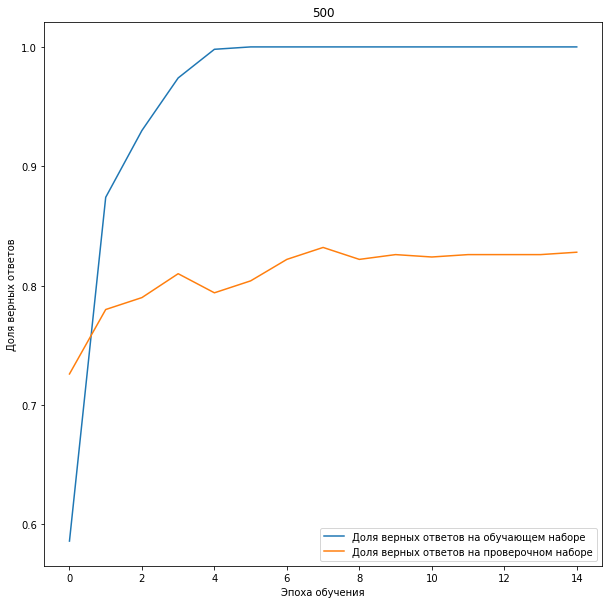

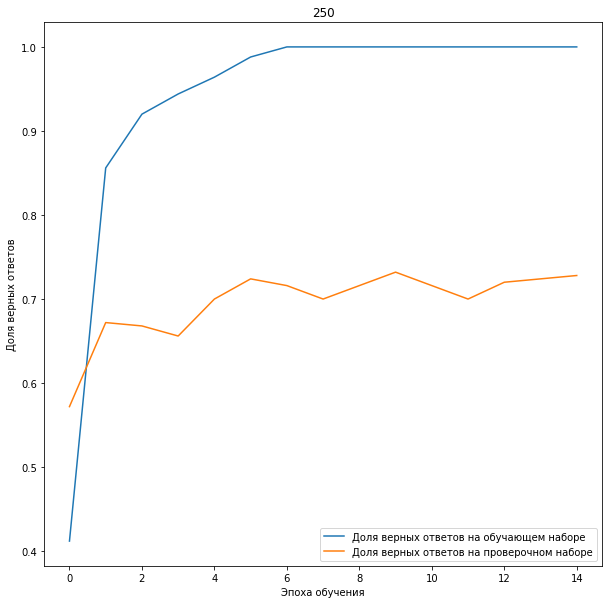

In [ ]:
# Выводим график точности на проверочной выборке
for train_var in [50000, 10000, 500, 250]:
  plt.figure(figsize=(10,10))
  plt.title(str(train_var))
  plt.plot(res[f'Размер обуч.выборки={train_var}'].history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(res[f'Размер обуч.выборки={train_var}'].history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')

  # Выводим подписи осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')

  # Выводим легенду
  plt.legend()
  plt.show()

In [ ]:
res_df_1 = pd.DataFrame()
for train_var in [50000, 10000, 500, 250]:
   res_df_1[f'Размер обуч.выборки={train_var}'] = res[f'Размер обуч.выборки={train_var}'].history['val_accuracy']

Из графиков и таблицы видно, что точность нейронной сети при обучающей выборке 50000 - наивысшая, в остальных случаях сеть недообучена

In [ ]:
res_df_1

,Размер обуч.выборки=50000,Размер обуч.выборки=10000,Размер обуч.выборки=500,Размер обуч.выборки=250
0,0.96892,0.9321,0.708,0.620
1,0.97704,0.9496,0.778,0.720
2,0.98062,0.9486,0.764,0.672
3,0.98414,0.9566,0.788,0.696
4,0.98384,0.9546,0.826,0.664
5,0.98564,0.9531,0.810,0.724
6,0.98538,0.9548,0.820,0.724
7,0.98770,0.9560,0.830,0.732
8,0.99174,0.9648,0.828,0.756
9,0.98936,0.9410,0.820,0.736


**Попробуем другие варианты архитектуры**

Точность на тестовой выборке =0.988
Точность на проверочной выборке =0.975


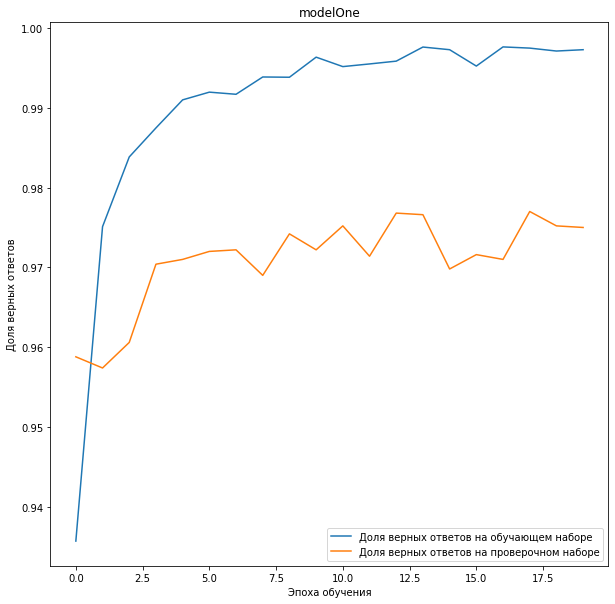

In [ ]:
modelOne = Sequential()
modelOne.add(Dense(400, input_dim=784, activation='relu'))
modelOne.add(Dense(800, activation='relu'))
modelOne.add(Dense(10, activation='softmax'))
modelOne.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = X[:60000]
y_train = Y[:60000]
X_val = X[60000:65000]
y_val = Y[60000:65000]
X_test = X[65000:]
y_test = Y[65000:]

resOne = modelOne.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val), verbose=0)

score_testOne = modelOne.evaluate(X_test, y_test, verbose=0)[-1]
score_valOne = resOne.history['val_accuracy'][-1]
print(f'Точность на тестовой выборке ={round(score_testOne, 3)}')
print(f'Точность на проверочной выборке ={round(score_valOne, 3)}')

plt.figure(figsize=(10,10))
plt.title('modelOne')
plt.plot(resOne.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(resOne.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

**Попробуем добавить слой DropOut**




Точность на тестовой выборке =0.988
Точность на проверочной выборке =0.973


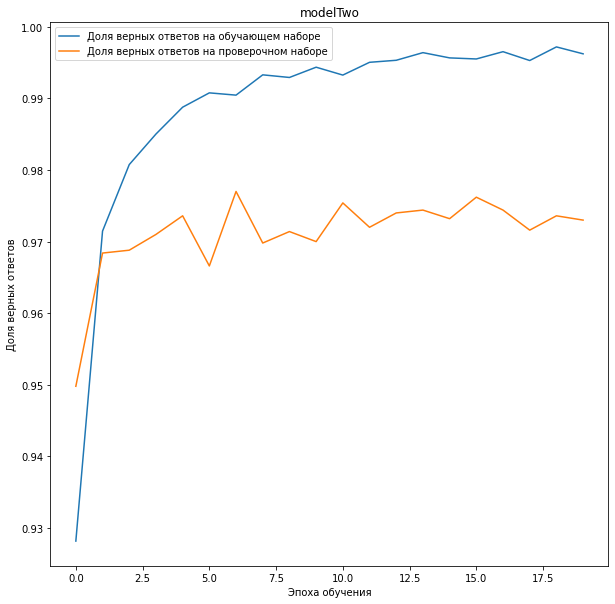

In [ ]:
modelTwo = Sequential()
modelTwo.add(Dense(300, input_dim=784, activation='relu'))
modelTwo.add(Dense(800, activation='relu'))
modelTwo.add(Dropout(0.4))
modelTwo.add(Dense(10, activation='softmax'))
modelTwo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = X[:60000]
y_train = Y[:60000]
X_val = X[60000:65000]
y_val = Y[60000:65000]
X_test = X[65000:]
y_test = Y[65000:]
resTwo = modelTwo.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val), verbose=0)

score_testTwo = modelTwo.evaluate(X_test, y_test, verbose=0)[-1]
score_valTwo = resTwo.history['val_accuracy'][-1]
print(f'Точность на тестовой выборке ={round(score_testTwo, 3)}')
print(f'Точность на проверочной выборке ={round(score_valTwo, 3)}')

plt.figure(figsize=(10,10))
plt.title('modelTwo')
plt.plot(resTwo.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(resTwo.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

a. 4 Dense слоя

b. 3 Dropout слоя

c. 3 BatchNormalization слоя

Epoch 1/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3466 - accuracy: 0.8959 - val_loss: 0.1516 - val_accuracy: 0.9516
Epoch 2/20
400/400 [==============================] - 1s 4ms/step - loss: 0.1685 - accuracy: 0.9476 - val_loss: 0.1235 - val_accuracy: 0.9600
Epoch 3/20
400/400 [==============================] - 1s 4ms/step - loss: 0.1310 - accuracy: 0.9592 - val_loss: 0.1121 - val_accuracy: 0.9632
Epoch 4/20
400/400 [==============================] - 1s 4ms/step - loss: 0.1089 - accuracy: 0.9649 - val_loss: 0.1011 - val_accuracy: 0.9710
Epoch 5/20
400/400 [==============================] - 1s 4ms/step - loss: 0.0957 - accuracy: 0.9701 - val_loss: 0.0925 - val_accuracy: 0.9748
Epoch 6/20
400/400 [==============================] - 1s 4ms/step - loss: 0.0920 - accuracy: 0.9710 - val_loss: 0.1031 - val_accuracy: 0.9682
Epoch 7/20
400/400 [==============================] - 1s 4ms/step - loss: 0.0801 - accuracy: 0.9746 - val_loss: 0.0971 - val_accuracy: 0.9738
Epoch 

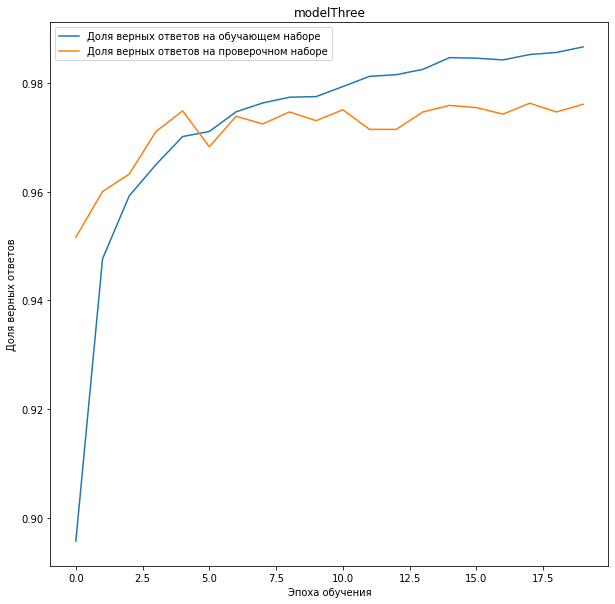

In [ ]:
modelThree = Sequential()

modelThree.add(BatchNormalization(input_shape=(784,)))
modelThree.add(Dropout(0.3))
modelThree.add(Dense(300, activation='relu'))

modelThree.add(BatchNormalization())
modelThree.add(Dense(800, activation='relu'))

modelThree.add(BatchNormalization())
modelThree.add(Dropout(0.3))
modelThree.add(Dense(400, activation='relu'))
modelThree.add(Dropout(0.3))
modelThree.add(Dense(10, activation='softmax'))

modelThree.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train = X[:60000]
y_train = Y[:60000]
X_val = X[60000:65000]
y_val = Y[60000:65000]
X_test = X[65000:]
y_test = Y[65000:]
resThree = modelThree.fit(X_train, y_train, batch_size=150, epochs=20, validation_data=(X_val, y_val), verbose=1)

score_testThree = modelThree.evaluate(X_test, y_test, verbose=0)[-1]
score_valThree = resThree.history['val_accuracy'][-1]
print(f'Точность на тестовой выборке ={round(score_testThree, 3)}')
print(f'Точность на проверочной выборке ={round(score_valThree, 3)}')
plt.figure(figsize=(10,10))
plt.title('modelThree')
plt.plot(resThree.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(resThree.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

In [ ]:
res_df_2 = pd.DataFrame({'Модель №1': {'Точность на тестовой': score_testOne, 'Точность на проверочной': score_valOne},
                         'Модель №2': {'Точность на тестовой': score_testTwo, 'Точность на проверочной': score_valTwo},
                         'Модель №3': {'Точность на тестовой': score_testThree, 'Точность на проверочной': score_valThree}})
res_df_2

,Модель №1,Модель №2,Модель №3
Точность на тестовой,0.9878,0.988,0.9912
Точность на проверочной,0.9750,0.973,0.9760


Соотношение обучающей/проверочной/тестовой во всех моделях одинаково и равно
64000/3000/3000

первая модель - БЕЗ слоя DropOut

вторая модель - с одним слоем DropOut

третья модель - многослойная модель

Исходя из таблицы видно, что применение многослойной модели (слоёв нормализации и слоёв dropOut) увеличивает точность на тестовой выборке, однако необходимо тщательно подобирать порядок следования слоёв

Модель по обнаружению мин.

In [ ]:
sonarDF = pd.read_csv('/content/drive/My Drive/Базы/sonar.csv', header=None)
sonarDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
data = sonarDF.values
X = data[:,0:60].astype(float)
Y = data[:,60]
Y[Y=='R'] = '0'
Y[Y=='M'] = '1'
Y = Y.astype(int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2, 
                                                            shuffle=True)

In [ ]:
train_size = 136

X_train = X_train_val[:train_size]
y_train = y_train_val[:train_size]
X_val = X_train_val[train_size:]
y_val = y_train_val[train_size:]

In [ ]:
mine_network = Sequential()

mine_network.add(BatchNormalization(input_shape=(60,)))

mine_network.add(Dropout(0.3))

mine_network.add(Dense(60, activation='relu'))

mine_network.add(Dropout(0.3))

mine_network.add(Dense(50, activation='relu'))

mine_network.add(Dropout(0.3))


mine_network.add(BatchNormalization())

mine_network.add(Dense(1, activation='sigmoid'))


mine_network.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), 
                     metrics=['accuracy'])

history = mine_network.fit(X_train, 
                           y_train, 
                           batch_size=15, 
                           epochs=200,
                           validation_data=(X_val, y_val), 
                           verbose=0)

mine_score = mine_network.evaluate(X_test, y_test)
print('проверочный', history.history['val_accuracy'][-1])
print('обучающий', history.history['accuracy'][-1])
print('тестовый', mine_score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9048
проверочный 0.8999999761581421
обучающий 0.9338235259056091
тестовый 0.9047619104385376


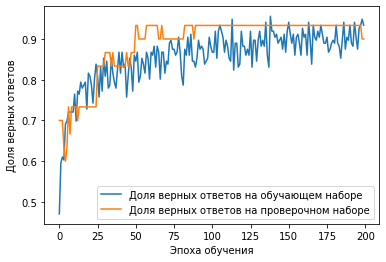

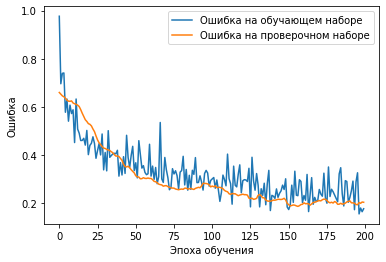

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Модель для предсказания цены машины.


In [ ]:
cars = pd.read_csv('/content/drive/My Drive/Базы/cars_new.csv', sep=',')

In [ ]:
def create_dict(s):
  ret = {}
  for _id, name in enumerate(s):
    ret.update({name: _id})
  return ret

def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [ ]:
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

prices = np.array(cars['price'], dtype=np.float)

years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
print(marks_dict)

{'subaru': 0, 'mercedes-benz': 1, 'mazda': 2, 'audi': 3, 'honda': 4, 'kia': 5, 'opel': 6, 'nissan': 7, 'skoda': 8, 'chevrolet': 9, 'peugeot': 10, 'toyota': 11, 'ford': 12, 'suzuki': 13, 'renault': 14, 'bmw': 15, 'hyundai': 16, 'daewoo': 17, 'mitsubishi': 18, 'volkswagen': 19, 'chery': 20}


In [ ]:
X = []
y = []

for _id, car in enumerate(np.array(cars)):
  y.append(prices[_id])

  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]

  X.append(x_tr)

X = np.array(X, dtype=np.float)
y = np.array(y, dtype=np.float)

In [ ]:
print(X.shape)
print(y.shape)

(70119, 3208)
(70119,)


In [ ]:
print(X[0,:20])
print(X[0,-20:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          1.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


In [ ]:
# Выводим y_train
print(y[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]


In [ ]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1,1)).flatten()

In [ ]:
y_scaled

array([ 0.75082432, -0.62135434,  0.3563911 , ...,  0.98171206,
        0.03659554, -0.15669277])

In [ ]:
# Выводим базовый и нормированный y_train
print(y[:10])
print(y_scaled[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]
[ 0.75082432 -0.62135434  0.3563911   0.70913625 -0.51745486  0.73318706
  0.09824578 -0.04445567  1.27032173 -0.4132347 ]


In [ ]:
percent_train = 0.9
percent_test = 0.1

train_size = int(round(len(y) * percent_train, 0))
test_size = int(round(len(y) * percent_test, 0))

X_train = X[:train_size]
y_train = y_scaled[:train_size]
X_test = X[-test_size:]
y_test = y_scaled[-test_size:]

In [ ]:
y_train

array([ 0.75082432, -0.62135434,  0.3563911 , ...,  0.67706851,
        0.65301771, -0.38116696])

In [ ]:
cars_network = Sequential()
cars_network.add(Dense(3000, input_shape=(3208,), activation='linear'))
cars_network.add(Dense(1500, activation='linear'))
cars_network.add(Dense(800, activation='linear'))
cars_network.add(Dense(1, activation='linear'))


cars_network.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mape'])

history = cars_network.fit(X_train, 
                           y_train, 
                           batch_size=300, 
                           epochs=200,
                           validation_split=0.1, 
                           verbose=1)



Epoch 1/200
190/190 [==============================] - 2s 9ms/step - loss: 0.5358 - mape: 209.5671 - val_loss: 0.3662 - val_mape: 198.2623
Epoch 2/200
190/190 [==============================] - 2s 8ms/step - loss: 0.2435 - mape: 149.3745 - val_loss: 0.3578 - val_mape: 133.9985
Epoch 3/200
190/190 [==============================] - 2s 9ms/step - loss: 0.2112 - mape: 141.2243 - val_loss: 0.2930 - val_mape: 146.7940
Epoch 4/200
190/190 [==============================] - 2s 8ms/step - loss: 0.1814 - mape: 133.3427 - val_loss: 0.2822 - val_mape: 138.3186
Epoch 5/200
190/190 [==============================] - 2s 8ms/step - loss: 0.1775 - mape: 129.0046 - val_loss: 0.2826 - val_mape: 152.7234
Epoch 6/200
190/190 [==============================] - 2s 8ms/step - loss: 0.1633 - mape: 131.1616 - val_loss: 0.2617 - val_mape: 169.5571
Epoch 7/200
190/190 [==============================] - 2s 9ms/step - loss: 0.1422 - mape: 117.8260 - val_loss: 0.2416 - val_mape: 144.4186
Epoch 8/200
190/190 [======

In [ ]:
predict = cars_network.predict(X_test)
predict_inverse = y_scaler.inverse_transform(predict).flatten()

In [ ]:
y_testReal = y[-test_size:]
y_trainReal = y[:train_size]

In [ ]:
delta = y_testReal - predict_inverse
abs_delta = abs(delta)
mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_trainReal)/len(y_trainReal)
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

Средняя ошибка:  96059.0
Средняя цена:  527557.0
Процент ошибки: 18.0%
